## Import Module

In [ ]:
import os
from zipfile import ZipFile
import tensorflow as tf
import numpy as np
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from google.colab import files
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pathlib
%matplotlib inline

ImportError: cannot import name 'ImageDataGenerator' from 'keras.preprocessing.image' (/usr/local/lib/python3.10/dist-packages/keras/api/preprocessing/image/__init__.py)

### Mengekstrak Data

In [ ]:
with ZipFile ("Dataset.zip", "r") as zip_ref :
  zip_ref.extractall()

### Augmentasi dan pemisahan data

In [ ]:
data = "/content/data"
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest',
                    validation_split=0.2)

### Generator

In [ ]:
train_generator = train_datagen.flow_from_directory(
    data,
    target_size=(150,150),
    class_mode = "categorical",
    shuffle = True,
    subset = "training",
)

valid_generator = train_datagen.flow_from_directory(
    data,
    target_size=(150,150),
    class_mode = "categorical",
    shuffle = True,
    subset = "validation",
)

Found 4505 images belonging to 4 classes.
Found 1126 images belonging to 4 classes.


### Callback

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.85 and logs.get('val_accuracy')>0.85):
      print("\nNilai accuracy telah mencapai 85%!")
      self.model.stop_training = True
callbacks = myCallback()

### Model Sequential

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(200, activation = "relu"),
    tf.keras.layers.Dense(500, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "softmax")
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 74, 74, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_12 (Conv2D)          (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 36, 36, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 17, 17, 64)       

### Kompilasi Model

In [ ]:
model.compile(loss = "categorical_crossentropy",
                 optimizer = "RMSprop",
                 metrics = ["accuracy"])

### Melatih Model

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=25,
      epochs=50,
      validation_data=valid_generator,
      validation_steps=5,
      callbacks=[callbacks],
      verbose=2)

Epoch 1/50
25/25 - 26s - loss: 1.3809 - accuracy: 0.3775 - val_loss: 1.4584 - val_accuracy: 0.2625 - 26s/epoch - 1s/step
Epoch 2/50
25/25 - 25s - loss: 0.9217 - accuracy: 0.5263 - val_loss: 0.7276 - val_accuracy: 0.5188 - 25s/epoch - 1s/step
Epoch 3/50
25/25 - 25s - loss: 0.7969 - accuracy: 0.5500 - val_loss: 0.6482 - val_accuracy: 0.6750 - 25s/epoch - 987ms/step
Epoch 4/50
25/25 - 25s - loss: 0.7480 - accuracy: 0.6000 - val_loss: 1.0169 - val_accuracy: 0.5625 - 25s/epoch - 994ms/step
Epoch 5/50
25/25 - 25s - loss: 0.6836 - accuracy: 0.6513 - val_loss: 0.6122 - val_accuracy: 0.6438 - 25s/epoch - 992ms/step
Epoch 6/50
25/25 - 23s - loss: 0.6474 - accuracy: 0.6575 - val_loss: 0.8316 - val_accuracy: 0.5813 - 23s/epoch - 929ms/step
Epoch 7/50
25/25 - 26s - loss: 0.6298 - accuracy: 0.6812 - val_loss: 1.3596 - val_accuracy: 0.4625 - 26s/epoch - 1s/step
Epoch 8/50
25/25 - 26s - loss: 0.6089 - accuracy: 0.6812 - val_loss: 0.7369 - val_accuracy: 0.6125 - 26s/epoch - 1s/step
Epoch 9/50
25/25 - 2

### Plot

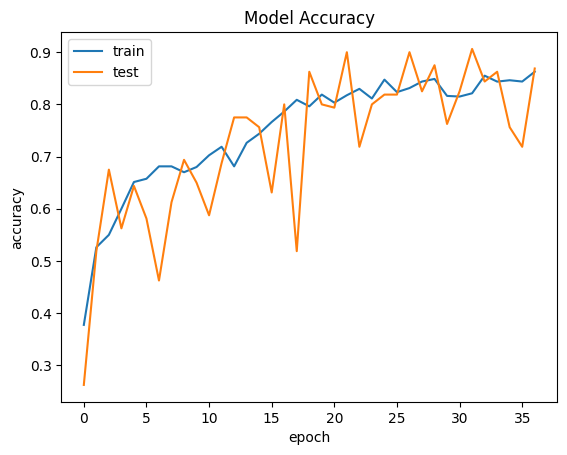

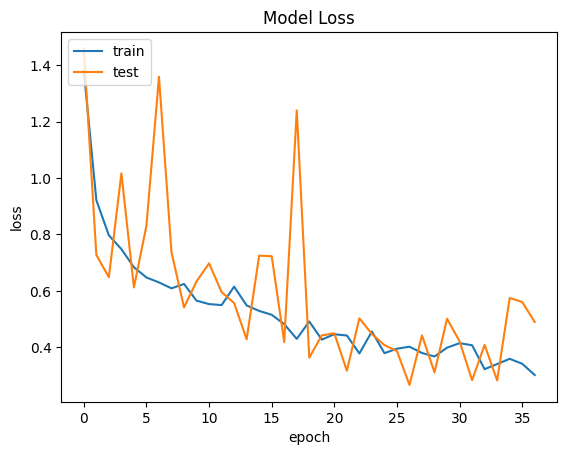

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Percobaan

Saving Forest_1404.jpg to Forest_1404.jpg
1/1 [==============================] - 0s 27ms/step
Forest_1404.jpg
Area hijau


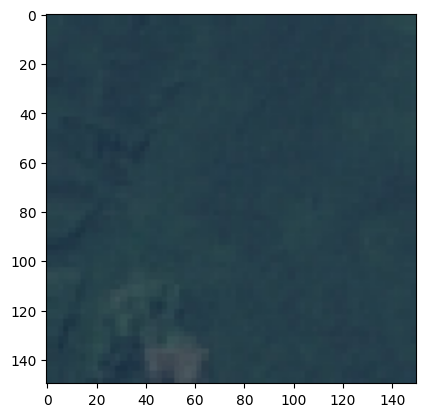

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  if classes[0][1]==1:
   print("Berawan")
  elif classes[0][2]==1:
    print("Gurun")
  elif classes[0][3]==1:
    print("Area hijau")
  else :
    print("Perairan")

### Tensorflow Lite

In [ ]:
export_dir = 'saved_model/'
tf.saved_model.save(model, export_dir)

converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

tflite_model_file = pathlib.Path('imageClassification.tflite')
tflite_model_file.write_bytes(tflite_model)

15306592